In [1]:
# MonStim_CSV_Analysis - main.py
from csv_to_pickle import pickle_data
import utils
import Analyze_EMG

DATA_PATH = 'files_to_analyze'
OUTPUT_PATH = 'output'


### Things to work on:
    # 1) More functions for dataset analysis:
        # each session should bring in and reference it's own parameters like scan rate, m/h-start/end, 
    # 2) Save session/dataset class objects for quicker reloading?
    # 3)

In [2]:
#Process CSVs into Pickle files: 'files_to_analyze' --> 'output'
# pickle_data(DATA_PATH, OUTPUT_PATH)

In [3]:
# Create dictionaries of Pickle datasets and single sessions that are in the 'output' directory.
dataset_dict, datasets = utils.unpackPickleOutput(OUTPUT_PATH)
for idx, dataset in enumerate(datasets):
    print(f'dataset index {idx}: {dataset}')

dataset index 0: 240521 BEN2 post-dec2 estim


In [4]:
# Define dataset of interest for downstream analysis.
dataset_idx = 0
dataset_oi = utils.dataset_oi(dataset_dict, datasets, dataset_idx)
dataset_oi.dataset_parameters()

# EMG Sessions: 4


In [30]:
# Define session of interest for downstream analysis.
session_idx = 3
session_oi = utils.session_oi(dataset_dict, datasets, dataset_idx, session_idx)
session_oi.session_parameters()

Session Name: BE24
# of Channels: 2
Scan rate (Hz): 100000
Samples/Channel: 110100
Stimulus delay (ms): 1.0
Stimulus duration (ms): 0.1
Stimulus interval (s): 5.0
EMG amp gains: [500, 1000, 500, 500, 500, 500]


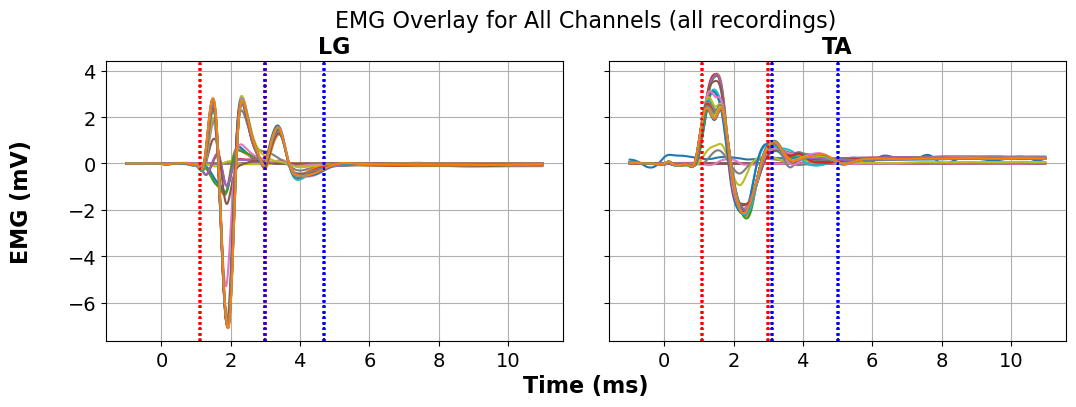

In [31]:
# Visualize single EMG session raw and filtered
# channel_names = ["LG", "TA"]
channel_names = ["LG", "TA"]

# session_oi.plot_emg_raw(channel_names=channel_names, m_flags=True, h_flags=True)
session_oi.plot_emg(channel_names=channel_names, m_flags=True, h_flags=True)
# session_oi.plot_emg_rectified_raw(channel_names=channel_names, m_flags=True, h_flags=True)
# session_oi.plot_emg_rectified(channel_names=channel_names, m_flags=True, h_flags=True)

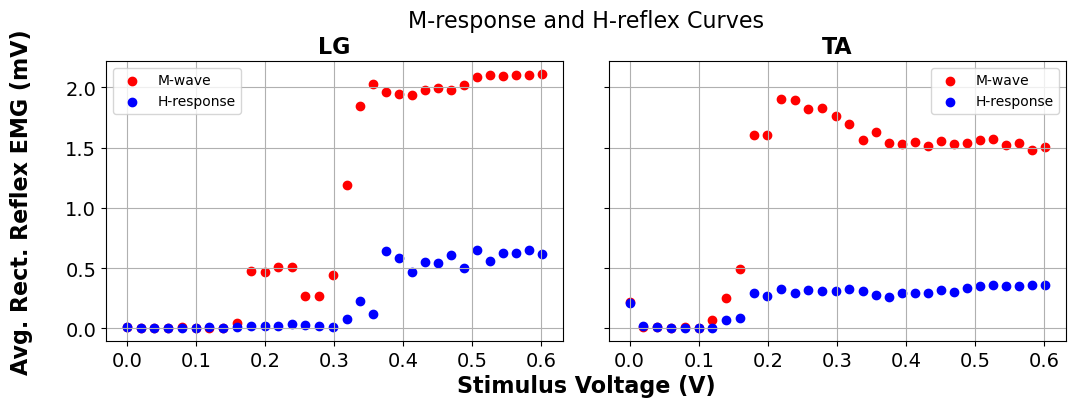

In [33]:
# Inspect reflex curves and suspected H-reflex trials
# session_oi.plot_emg_suspectedH(channel_names=channel_names, h_threshold=.7)
session_oi.plot_reflex_curves(channel_names=channel_names, method='avg_rectified')

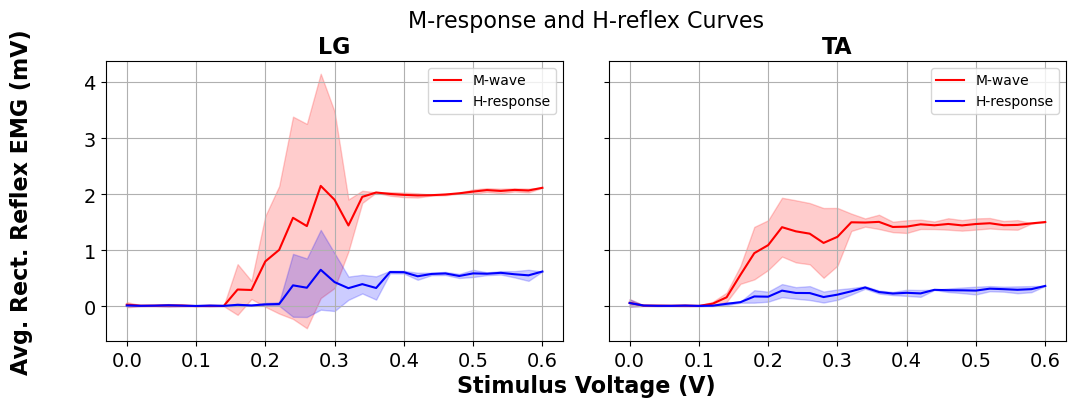

In [34]:
dataset_oi.plot_reflex_curves(channel_names=channel_names, method='avg_rectified')